# Sales Analysis Project

### Import necessary libraries updated them if needed
> Numpy - Matplotlib - Pandas - Seaborn - Operating System

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Step One: Collect Data 

#### Merge data of each month into one CSV
In the given folder (Sales Data), you will find a group of csv files. Merge them in one data frame, then save them in a separate csv file

In [2]:
all_data_frames = []
for dirname, _, filenames in os.walk('./Sales_Data/'):
    for filename in filenames:
        all_data_frames.append(pd.read_csv(os.path.join(dirname, filename)))

In [3]:
data_df = pd.concat(all_data_frames)
data_df.to_csv('all_months.csv')

### Read the updated dataframe

In [4]:
data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Investigating the Data
Read the itemdescription.txt to understand the given data.

Explore the data and comment on it

In [5]:
data_df[data_df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
data_df = data_df[data_df.Product != 'Product']
data_df.to_csv('all_months.csv')

In [7]:
data_df.shape

(186495, 6)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [9]:
data_df.describe().T

,count,unique,top,freq
Order ID,185950,178437,160873,5
Product,185950,19,USB-C Charging Cable,21903
Quantity Ordered,185950,9,1,168552
Price Each,185950,23,11.95,21903
Order Date,185950,142395,12/15/19 20:16,8
Purchase Address,185950,140787,"193 Forest St, San Francisco, CA 94016",9


In [10]:
data_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Comment on the Data

1- all data type of columnn is object, then we should convert the data type of columns
(Order ID, Quantity Ordered, Price Each, Order Date) from objects to
(int64, int64, float64, datetime)

2- found 545 rows is missing, we can handle them with drop row with missing because the data is large.

## Preparing and Cleaning up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [11]:
data_df['Order Date'] = pd.to_datetime(data_df['Order Date'], format='%m/%d/%y %H:%M')

In [12]:
data_df['Month'] = data_df['Order Date'].dt.month

In [13]:
data_df = data_df.dropna(axis = 0)

In [14]:
data_df['Price Each'] = data_df['Price Each'].astype(np.float64)   
data_df['Quantity Ordered'] = data_df['Quantity Ordered'].astype(np.int64)

In [15]:
data_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                      float64
dtype: object

In [16]:
data_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [17]:
data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0


## Data Exploration!

* Question 1: What was the best month for sales? How much was the total sales in that month? (Analatically and graphically)
* Question 2: Which city have sold the most products?
* Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
* Question 4: What products are most often sold together? (Bonus)
* Question 5: What product sold the most? Why do you think it sold the most?

> Comment on each result

#### Question 1: What was the best month for sales? How much was earned that month? (Analatically and graphically)
Draw a bar chart that can idicate the month with the higest (in green) and lowest sales (in red)
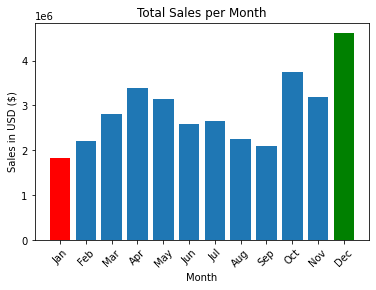

In [18]:
def Colors(data):
    colors =[]
    for i in data:
        if i == max(data):
            colors.append('green')
        elif i == min(data):
            colors.append('red')
        else:
            colors.append('blue')
    return colors

In [19]:
data_df['Sales'] = data_df['Price Each']  * data_df['Quantity Ordered']

<AxesSubplot:title={'center':'Total Sales Per Month'}, xlabel='Month', ylabel='Sales in USD($)'>

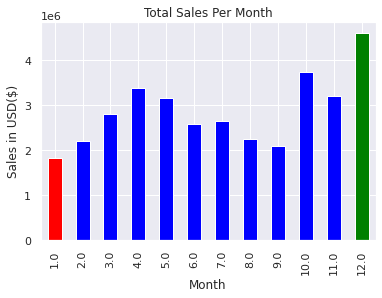

In [20]:
SalesPerMonth = data_df.groupby('Month')['Sales'].sum()
col = Colors(SalesPerMonth)
SalesPerMonth.plot(kind='bar', xlabel='Month',
                   ylabel='Sales in USD($)', title='Total Sales Per Month', color = col)

In [21]:
MonthWithMaxSale = SalesPerMonth.sort_values(ascending=False).index[0]
MonthWithMaxSale

12.0

In [22]:
MonthWithMinSale = SalesPerMonth.sort_values(ascending=False).index[-1]
MonthWithMinSale

1.0

#### Question 2: What city sold the most product?

In [23]:
data_df['City'] = data_df['Purchase Address'].str.split(',').str[1]

<AxesSubplot:title={'center':'Total Product per City'}, xlabel='City', ylabel='Sales in USD($)'>

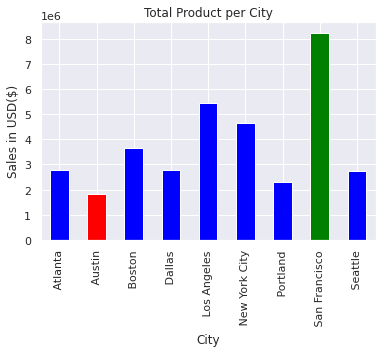

In [24]:
SalesPerCity = data_df.groupby('City')['Sales'].sum()
col = Colors(SalesPerCity)

SalesPerCity.plot(kind='bar', xlabel='City',
                  ylabel='Sales in USD($)', title='Total Product per City',
                  rot=90, color = col)

In [25]:
CityWithMaxSale = SalesPerCity.sort_values(ascending=False).index[0]
CityWithMaxSale

' San Francisco'

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
Plot the number of purchase orders done in every hour and mark the higest hour

In [26]:
data_df['Hour'] = data_df['Order Date'].dt.hour

<AxesSubplot:title={'center':'Total purchase orders per Hour'}, xlabel='hours', ylabel='number of purchase orders'>

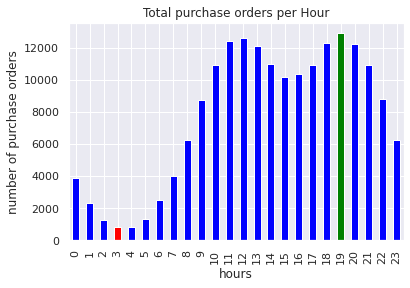

In [27]:
purchaseOrdersPerHour = data_df.groupby('Hour')['Order ID'].count()
col = Colors(purchaseOrdersPerHour)

purchaseOrdersPerHour.plot(kind='bar', xlabel='hours',
                           ylabel='number of purchase orders', title='Total purchase orders per Hour',
                           rot=90, color = col)

In [28]:
hourWithMaxOrder = purchaseOrdersPerHour.sort_values(ascending=False).index[0]
hourWithMaxOrder

19

#### Question 4: What products are most often sold together?

#### Question 5: What product sold the most? Why do you think it sold the most?

<AxesSubplot:title={'center':'Total Quantities per product'}, xlabel='Product', ylabel='Order Quantities per product'>

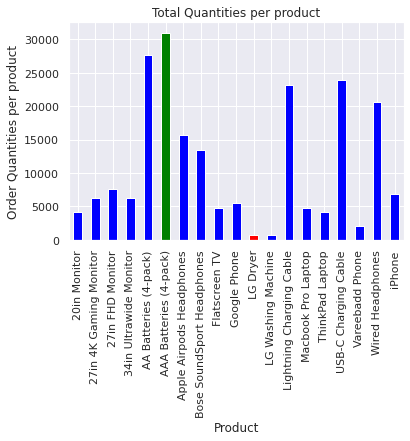

In [29]:
QuantitiesPerProduct = data_df.groupby('Product')['Quantity Ordered'].sum()
col = Colors(QuantitiesPerProduct)

QuantitiesPerProduct.plot(kind='bar', xlabel='Product',
                                ylabel='Order Quantities per product', title='Total Quantities per product',
                                rot=90, color = col)

In [30]:
ProductmostSold = QuantitiesPerProduct.sort_values(ascending=False).index[0]

In [31]:
ProductmostSold

'AAA Batteries (4-pack)'